## User Input Files

#This code is used to calculate equilibrium points, plot nullclines and to plot phase plane plots

In [2]:
#All Importations
from sympy import *
import numpy as np
import matplotlib.pyplot as plt


In [5]:
#Finding the roots of the polynomial 
#Input vales you would like to test for a1, a2 and m
t, m = symbols("t, m")
a1 = float(input('Measure of Allee Effect in the first population?'))
a2 = float(input('Measure of Allee Effect in the second population?'))
m = float(input('Symmetric Migration rate from Patch 1 to Patch 2 and Patch 2 to Patch 1)?'))
x = Function("x")
y = Function("y")

y_exp_trial= ((((x(t)/a1) - 1) * (1 - x(t)) * x(t)) + m* x(t))/(-m)
exp_trial = ((y(t)/a2) - 1) * (1 - y(t)) * y(t) + m* (x(t) - y(t))
res_exp_trial = exp_trial.subs(y(t), y_exp_trial) 

#Ignore most imaginary roots 
Equilib_pts = nroots(res_exp_trial)
N = 3
result = Equilib_pts[:N]

#Turning list into array
Equilib_pts_1=np.array(result)
display(result)

[0, 0.115026403074735, 1.46028287396870]

In [11]:
DS1 = ((x(t)/a1) - 1) * (1 - x(t)) * x(t) + m*(-x(t)+ y(t))
DS2 = ((y(t)/a2) - 1) * (1 - y(t)) * y(t) + m*(x(t) - y(t))

#The Jacobian for the Matrix
Jacobian = Matrix(
    [
    [diff(DS1, x(t)), diff(DS1, y(t))], 
    [diff(DS2, x(t)), diff(DS2, y(t))]
    ])
Jacobian

#Loop to calculate the Jacobian at each point
#Then determine the Stability of each of the equilibrium points
for i in result: 
    Jac = simplify(Jacobian.subs({x(t) : i, y(t): 0}))
    display(Jac)
    stabil= det(Jac)
    display(stabil)
    if stabil > 0:
        print('This equilibrium point is unstable')
    else :
        print('This Equibilibrium Point is stable')


Matrix([
[-1.5,  0.5],
[ 0.5, -1.5]])

2.00000000000000

This equilibrium point is unstable


Matrix([
[-0.889228021977458,  0.5],
[               0.5, -1.5]])

1.08384203296619

This equilibrium point is unstable


Matrix([
[-5.53285918822546,  0.5],
[              0.5, -1.5]])

8.04928878233819

This equilibrium point is unstable


In [ ]:
#Determine the Stability of each of the equilibrium points


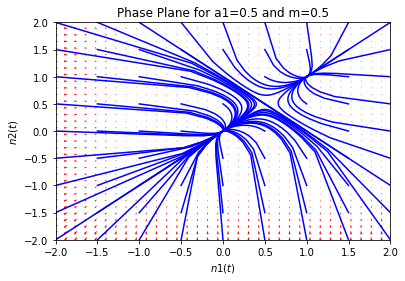

In [12]:
def f(Y, t):
    x, y = Y
    return [((x/a1) - 1) * (1 - x) * x + m* (y-x), ((y/a2) - 1) * (1 - y) * y + m * (x-y)]

x1 = np.linspace(-3.0, 3.0, 50)
y1 = np.linspace(-3.0, 3.0, 50)

Y1, Y2 = np.meshgrid(x1, y1)

t = 0

u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)

NI, NJ = Y1.shape

for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        yprime = f([x, y], t)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]
     

Q = plt.quiver(Y1, Y2, u, v, color='r')

plt.xlabel('$n1(t)$')
plt.ylabel('$n2(t)$')
plt.title('Phase Plane for a1=0.5 and m=0.5')


from scipy.integrate import odeint
l = [-2.0,-1.5,-1.0,-0.5,0,0.5, 1, 1.5, 2.0]
for y20 in l:
    for y10 in l:
        tspan = np.linspace(0, 50, 200)
        y0 = [y10, y20]
        ys = odeint(f, y0, tspan)
        plt.plot(ys[:,0], ys[:,1], 'b-') # path
    # plt.plot([ys[0,0]], [ys[0,1]], 'o') # start
    # plt.plot([ys[-1,0]], [ys[-1,1]], 's') # end
    

plt.xlim([-2, 2])
plt.ylim([-2,2])

plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

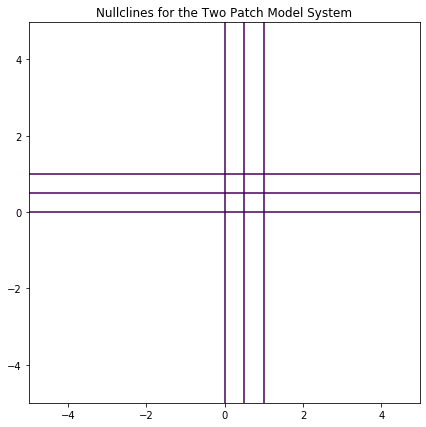

In [35]:
#Nullclines 

fig= plt.figure(1, figsize=(7,7))

delta= 0.025
x_2,y_2 = np.meshgrid(np.arange(-5,5,delta), np.arange(-5,5,delta))

f1 = ((x_2/a1) - 1) * (1 - x_2) * x_2 - (m * x_2)+ (m*y_2)
f2 = ((y_2/a2) - 1) * (1 - y_2) * y_2 + (m * x_2)- (m*y_2)

plt.contour(x_2, y_2, f1,[0])
plt.contour(x_2, y_2, f2, [0])
plt.title('Nullclines for the Two Patch Model System')
plt.show